In [6]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import matplotlib.dates as mdates
import os
import yaml
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

home       = os.path.expanduser("~")
yaml_path  = os.path.join(home, 'dirpaths.yaml')
data_dir   = yaml.safe_load(open(yaml_path))['DATA_PATH']

fname      = 'era5_warm.vars.nc'
fpath      = os.path.join(data_dir, 'jules', 'output', 'era5_larsen_b_grid_point', fname)
output     = nc.Dataset(fpath, 'r')
start_time = pd.Timestamp('2013-01-01 00:00')

In [7]:
# constant hot forcing, firn temp initialised to -10oC 
# no percolation: l_snow_infilt=.false.
# no spectral albedo l_spec_albedo=.false.

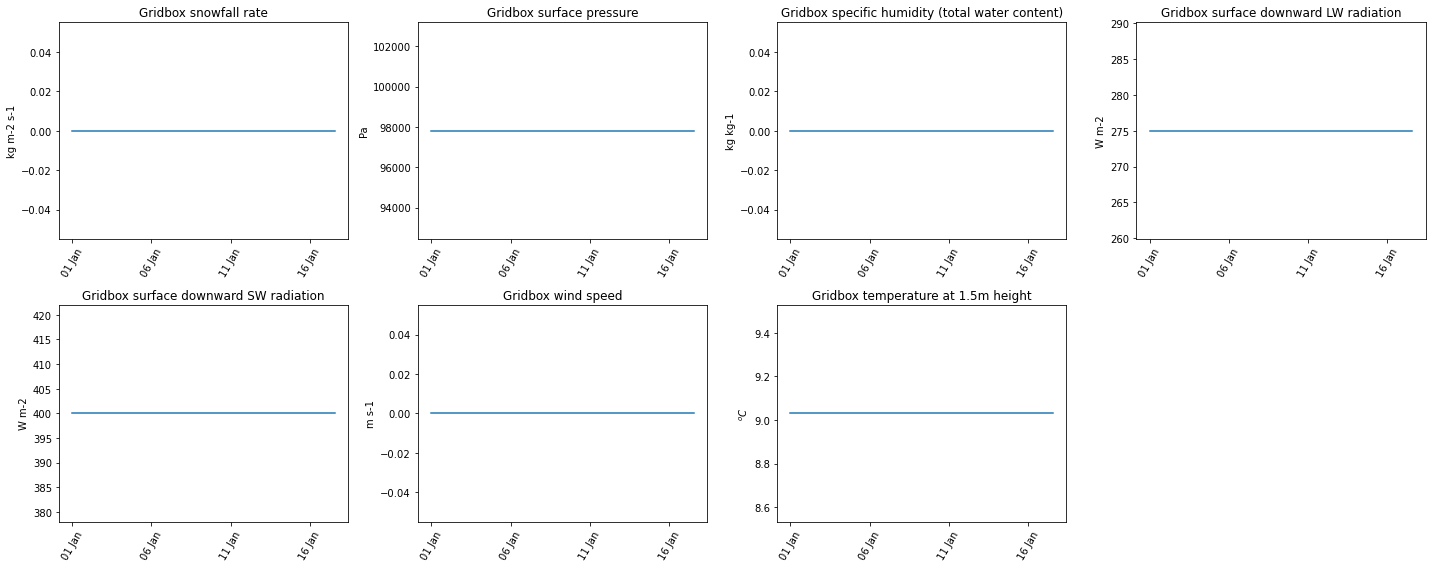

In [8]:
# plot all vars with dimensions (time, y, x)
#gb_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'y', 'x')]
gb_vars = ['snowfall','pstar','qw1','lw_down','sw_down','wind','t1p5m_gb']

fig, axes = plt.subplots(-(-len(gb_vars) // 4), 4, figsize=(20, 4 * ((len(gb_vars) + 3) // 4)))
axes = axes.flat

for ax, v in zip(axes, gb_vars):
    data = output[v][1:400, 0, 0]
    

    units = getattr(output[v], 'units', '')    
    time = pd.date_range(start=start_time, periods=len(data), freq='H')

    if v == 't1p5m_gb':
        data -= 273.15
        units = '$^oC$'
        
    ax.plot(time, data)
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel(units)
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

    
    ax.tick_params(axis='x', rotation=60)

for ax in axes[len(gb_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

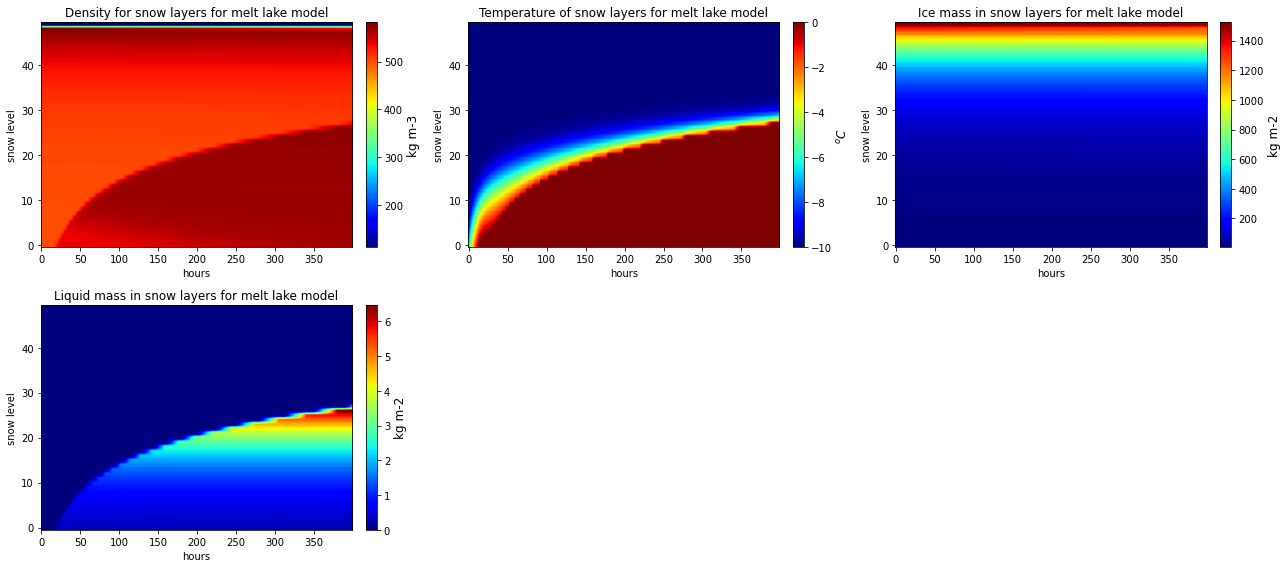

In [9]:
# plot all vars with dimensions (time, snow, tile, y, x) 
#snow_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'snow_ml', 'tile', 'y', 'x')]
snow_vars = ['rho_snow_ml', 'tsnow_ml', 'snow_ice_ml', 'snow_liq_ml']
fig, axes = plt.subplots(2, 3, figsize=(18, 8))  
axes = axes.flat


for ax, v in zip(axes, snow_vars):
    
    data_2d = output[v][0:399,:, -1, 0, 0]
    units = getattr(output[v], 'units', '')  
    time = pd.date_range(start=start_time, periods=len(data_2d), freq='H')
    
    if v == 'tsnow_ml':
        data_2d -= 273.15
        units = '$^oC$'
        
    im = ax.imshow(data_2d.T,aspect='auto', origin='lower', cmap='jet')
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel('snow level')
    ax.set_xlabel('hours')
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label(units, fontsize=12)
    #ax.set_xlim(0, 10)
    
for ax in axes[len(snow_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [10]:
# density of ~200kgm-3 at base of the snowpack- perhaps because compaction is missing. 

In [11]:
tsnow_ml = output.variables['tsnow_ml'][99,0,8,0,0]-273.15
print(tsnow_ml) 

snow_ice_ml = output.variables['snow_ice_ml'][99,0,8,0,0]
print(snow_ice_ml) 

rho_snow_ml = output.variables['rho_snow_ml'][99,0,8,0,0]
print(rho_snow_ml) 

-6.1035156022626325e-06
5.018483
539.41034


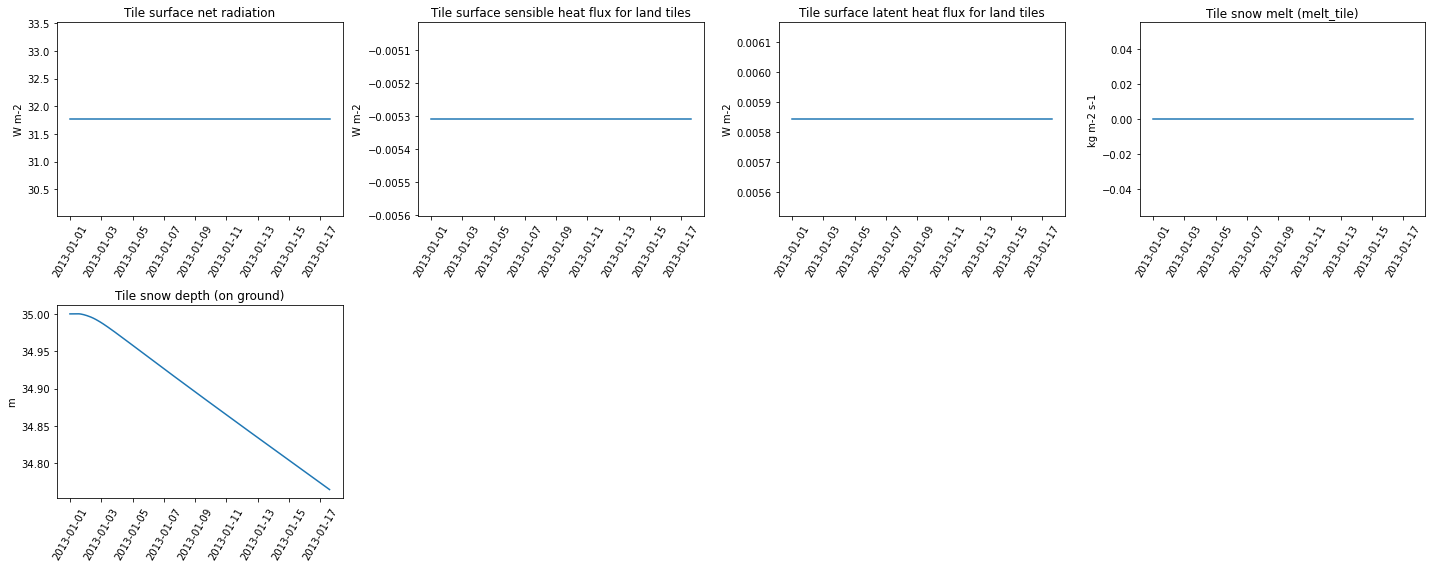

In [5]:
# plot all vars with dimensiosn (time, tile, y, x)

#tile_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'tile', 'y', 'x')]

tile_vars = ['rad_net_tile','ftl','le','snow_melt', 'snow_depth']

fig, axes = plt.subplots(-(-len(tile_vars) // 4), 4, figsize=(20, 4 * ((len(tile_vars) + 3) // 4)))
axes = axes.flat

for ax, v in zip(axes, tile_vars):
    data = output[v][1:400, 8, 0, 0]
    
    units = getattr(output[v], 'units', '')    
    time = pd.date_range(start=start_time, periods=len(data), freq='H')

    if v == 'tstar':
        data -= 273.15
        units = '$^oC$'
        
    ax.plot(time, data)
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel(units)
    #ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    
    ax.tick_params(axis='x', rotation=60)

for ax in axes[len(tile_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [ ]:
# sensible heat flux is negative heat snowpack --> atmosphere
# latent heat is positive i.e. sublimination likely due to setting specific humidity to zero (very dry air)
# something is wrong with the melt_tile (it should not be zero). 